In [44]:
from google.colab import drive
drive.mount("/content/gdrive/")
import os
os.chdir("/content/gdrive/My Drive/MultimodalEmotion/MODULE1")
!ls

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
 extracted_text.txt   Lenna_color.png  'Text Extraction.ipynb'


# Importing the libraries

In [ ]:
#!pip install pillow
#!pip install pytesseract

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

# Preprocessing

In [ ]:
#get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Plotting the original image

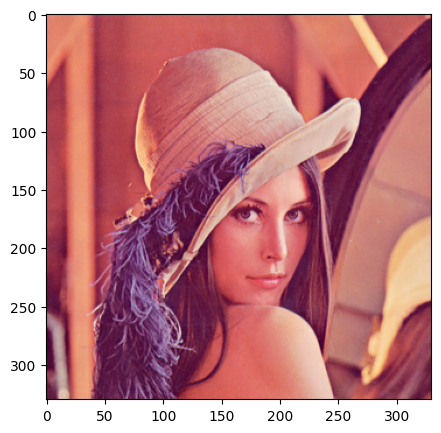

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

image = cv2.imread('Lenna_color.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.show()

In [ ]:
gray = get_grayscale(image)
rem_noise = remove_noise(gray)
thresh = thresholding(gray)
canny = canny(thresh)
images = {'grayscale': gray,
          'remove noise': rem_noise,
          'thresholding': thresh,
          'canny': canny}

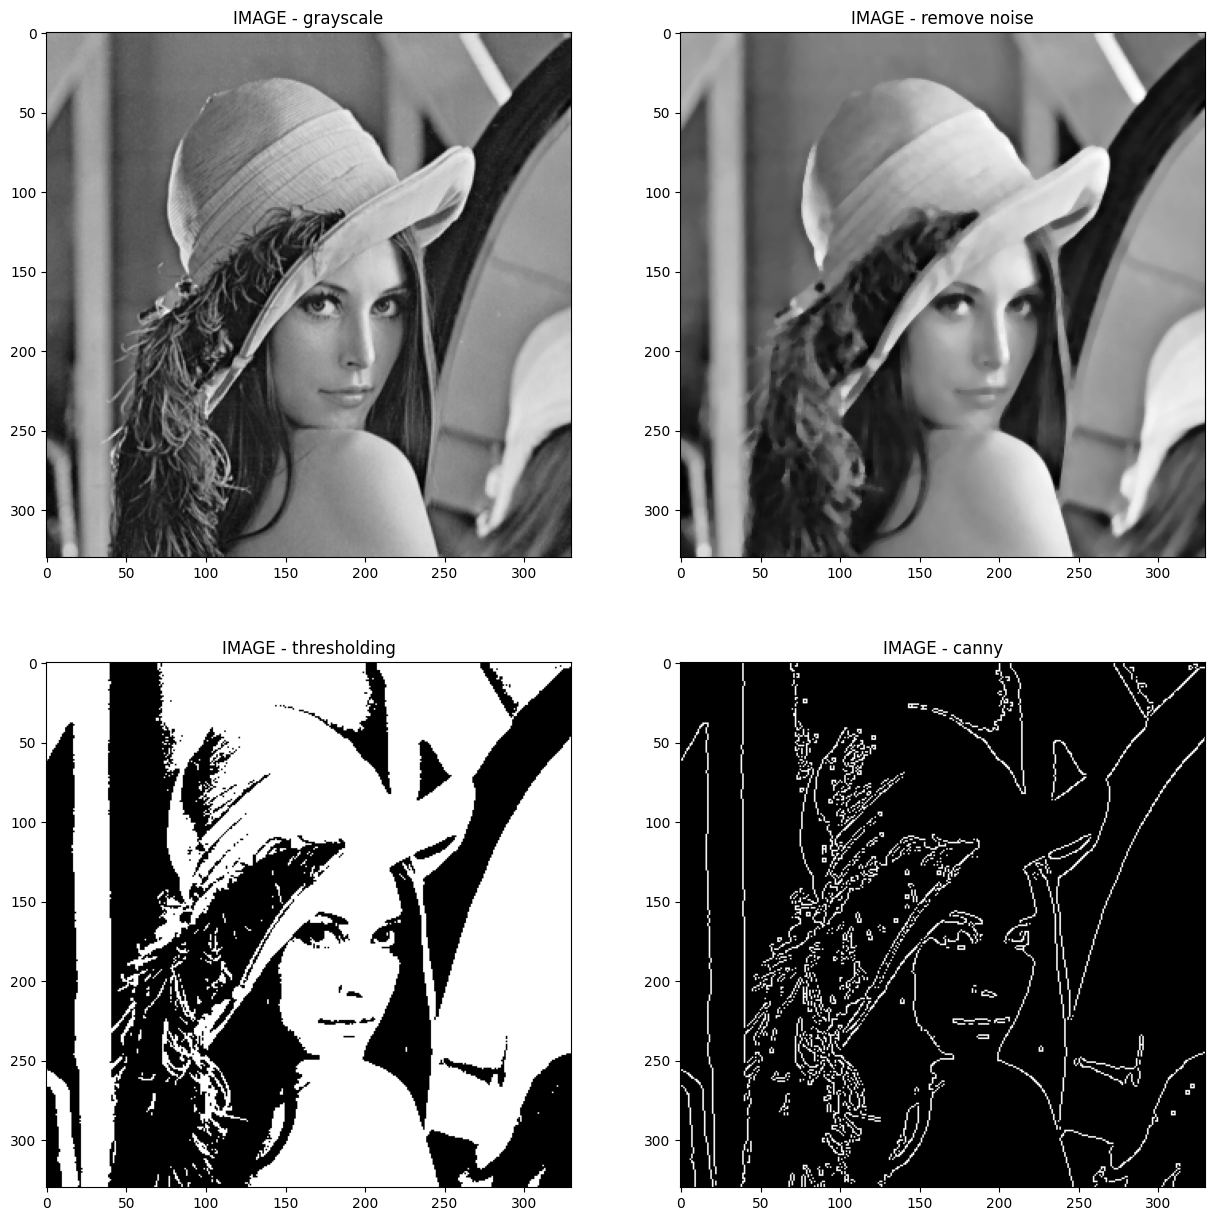

In [ ]:
# Plot images after preprocessing

fig = plt.figure(figsize=(15,15))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('IMAGE - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [ ]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'

extracted_text = pytesseract.image_to_string(canny, config=custom_config)

print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(thresh, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(rem_noise, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(canny, config=custom_config))

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
with open("extracted_text.txt", "w") as file:
    file.write(extracted_text)
